# tfdeepsurv for simulated data

## Introduction

Let's use `tfdeepsurv` package to build a neural network for predicting hazard ratio. This notebook 
will show you how to build and train a neural network.

## Preparation

For all things going well, you would be better to get acquainted with **Survival Analysis**. Otherwise, I suggest you read the [reference](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html).

## Package installation

Please follow the instructions on [README](../README.md) to install `tfdeepsurv` package.

## Get it started

### Obtain datasets 

In [1]:
from tfdeepsurv.datasets import load_simulated_data

### generate simulated data (Pandas.DataFrame)
# data configuration: 
#     hazard ratio = 2000
#     number of features = 10
#     number of valid features = 2

# No. of training data = 2000
train_data = load_simulated_data(2000, N=2000, num_var=2, num_features=10, seed=1)
# No. of training data = 800
test_data = load_simulated_data(2000, N=800, num_var=2, num_features=10, seed=1)

train_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,e,t
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,1,0.933961
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,1,0.242949
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,0,15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,0,15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,0,15.000000


### Dataset statistics

--------------- Survival Data Statistics ---------------
# Rows: 2000
# Columns: 10 + e + t
# Events Ratio: 0.74%
# Min Time: 0.0001404392
# Max Time: 15.0



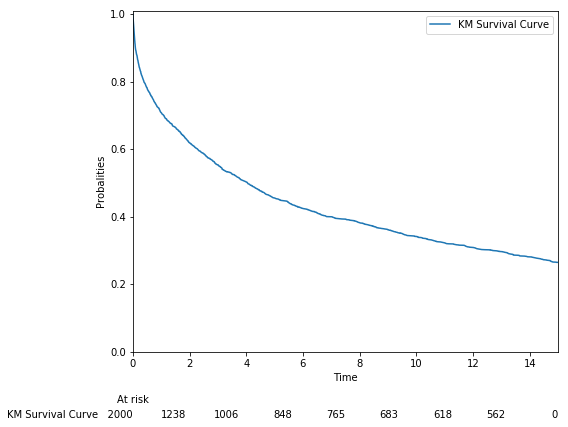

In [2]:
from tfdeepsurv.datasets import survival_stats

survival_stats(train_data, t_col="t", e_col="e", plot=True)

--------------- Survival Data Statistics ---------------
# Rows: 800
# Columns: 10 + e + t
# Events Ratio: 0.74%
# Min Time: 0.00054798834
# Max Time: 15.0



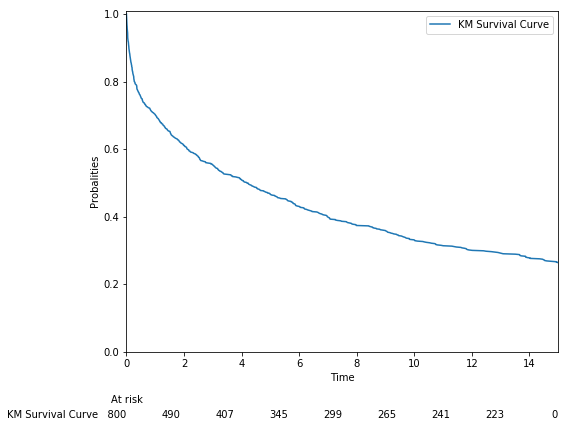

In [3]:
survival_stats(test_data, t_col="t", e_col="e", plot=True)

### Survival data transfrom

The transformed survival data contains an new label. Negtive values are considered as right censored, 
and positive values are considered as event occurrence.

**NOTE**: In version 2.0, survival data must be transformed via `tfdeepsurv.datasets.survival_df`.

In [4]:
from tfdeepsurv.datasets import survival_df

surv_train = survival_df(train_data, t_col="t", e_col="e", label_col="Y")
surv_test = survival_df(test_data, t_col="t", e_col="e", label_col="Y")

# columns 't' and 'e' are packed into an new column 'Y'
surv_train.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,Y
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,0.933961
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,0.242949
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,-15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,-15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,-15.000000


### Model initialization

In [5]:
from tfdeepsurv import dsnn

input_nodes = 10
hidden_layers_nodes = [6, 3, 1]

# the arguments of dsnn can be obtained by Bayesian Hyperparameters Tuning
nn_config = {
    "learning_rate": 0.7,
    "learning_rate_decay": 1.0,
    "activation": 'relu', 
    "L1_reg": 3.4e-5, 
    "L2_reg": 8.8e-5, 
    "optimizer": 'sgd',
    "dropout_keep_prob": 1.0,
    "seed": 1
}
# ESSENTIAL STEP: Pass arguments
model = dsnn(
    input_nodes, 
    hidden_layers_nodes,
    nn_config
)
# ESSENTIAL STEP: Build Computation Graph
model.build_graph()

### Model training

You can save your trained model by passing `save_model="file_name.ckpt"` or load your trained model by passing `load_model="file_name.ckpt"`

Average loss at step 100: 6.29702
Average loss at step 200: 6.29701
Average loss at step 300: 6.29700
Average loss at step 400: 6.29699
Average loss at step 500: 6.29698
Average loss at step 600: 6.29697
Average loss at step 700: 6.29697
Average loss at step 800: 6.29696
Average loss at step 900: 6.29695
Average loss at step 1000: 6.29697
Average loss at step 1100: 6.29693
Average loss at step 1200: 6.29690
Average loss at step 1300: 6.29681
Average loss at step 1400: 6.29497
Average loss at step 1500: 6.22250
Average loss at step 1600: 6.01389
Average loss at step 1700: 5.99277
Average loss at step 1800: 5.98749
Average loss at step 1900: 5.98466


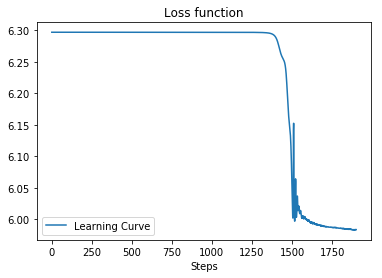

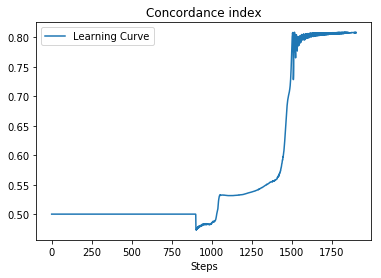

In [6]:
Y_col = ["Y"]
X_cols = [c for c in surv_train.columns if c not in Y_col]

# model saving and loading is also supported!
# read comments of `train()` function if necessary.
watch_list = model.train(
    surv_train[X_cols], surv_train[Y_col],
    num_steps=1900,
    num_skip_steps=100,
    plot=True
)

### Model evaluation

In [7]:
print("CI on training data:", model.evals(surv_train[X_cols], surv_train[Y_col]))
print("CI on test data:", model.evals(surv_test[X_cols], surv_test[Y_col]))

CI on training data: 0.8070749683759434
CI on test data: 0.8098841802686211


### Model prediction

Model prediction includes:
- predicting hazard ratio or log hazard ratio
- predicting survival function

In [8]:
# predict log hazard ratio
print(model.predict(surv_test.loc[0:10, X_cols]))
# predict hazard ratio
print(model.predict(surv_test.loc[0:10, X_cols], output_margin=False))

[[1.3238575]
 [1.1932976]
 [3.409112 ]
 [2.3401275]
 [3.3911765]
 [3.4612393]
 [2.1510317]
 [3.4415257]
 [2.8796167]
 [3.8240776]
 [1.0372685]]
[[ 3.7578897]
 [ 3.2979386]
 [30.23838  ]
 [10.38256  ]
 [29.700874 ]
 [31.856434 ]
 [ 8.59372  ]
 [31.234577 ]
 [17.807447 ]
 [45.790543 ]
 [ 2.8214996]]


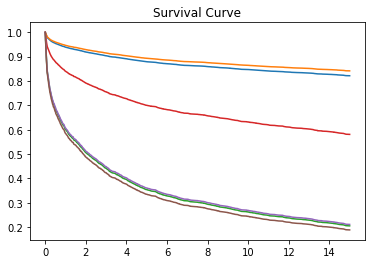

,0.00014043919509276748,0.00039331152220256627,0.00126435118727386,0.0027157075237482786,0.002904581604525447,0.0030980780720710754,0.003499445738270879,0.0036616716533899307,0.004621267784386873,0.004637269768863916,...,14.737560272216797,14.74014663696289,14.750370979309082,14.778524398803711,14.781179428100586,14.794774055480957,14.816924095153809,14.933478355407715,14.945713996887207,15.0
0,0.999896,0.999791,0.999687,0.999582,0.999478,0.999373,0.999269,0.999165,0.999060,0.998956,...,0.822885,0.822704,0.822524,0.822343,0.822162,0.821981,0.821800,0.821619,0.821437,0.821437
1,0.999908,0.999817,0.999725,0.999633,0.999542,0.999450,0.999358,0.999267,0.999175,0.999084,...,0.842755,0.842593,0.842430,0.842268,0.842105,0.841943,0.841780,0.841617,0.841453,0.841453
2,0.999160,0.998321,0.997482,0.996644,0.995806,0.994970,0.994134,0.993298,0.992463,0.991629,...,0.208336,0.207969,0.207601,0.207235,0.206868,0.206502,0.206136,0.205770,0.205405,0.205405
3,0.999711,0.999423,0.999135,0.998846,0.998558,0.998270,0.997982,0.997694,0.997406,0.997118,...,0.583570,0.583216,0.582863,0.582509,0.582155,0.581801,0.581447,0.581092,0.580738,0.580738
4,0.999175,0.998350,0.997527,0.996703,0.995881,0.995059,0.994237,0.993417,0.992597,0.991777,...,0.214227,0.213856,0.213485,0.213114,0.212744,0.212374,0.212004,0.211635,0.211266,0.211266
5,0.999115,0.998231,0.997347,0.996465,0.995582,0.994701,0.993821,0.992941,0.992062,0.991183,...,0.191563,0.191207,0.190851,0.190496,0.190141,0.189787,0.189432,0.189078,0.188724,0.188724


In [9]:
# predict survival function
model.predict_survival_function(surv_test.loc[0:5, X_cols], plot=True)

### tf.session close

To release resources, we use `model.close_session()` to close session in tensorflow!

In [10]:
model.close_session()

Current session closed.
